# LLM API - OpenRouter.AI

In [ ]:
!pip install openai

In [ ]:
# from openai import OpenAI
import pandas as pd
import os
from openai import OpenAI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Creating base directories
base_dir = '/content/drive/MyDrive/RTS_Chetan_Chathurvedhi'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Client

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

model_table = {
    "phi": "microsoft/phi-3-medium-128k-instruct:free",
    "lfm":"liquid/lfm-40b:free",
  }


In [ ]:
# Response function to generate sql query

counter = 0

def generate_sql_query(model, natural_language_query, schema, top_entries, shot):
  if shot == 0:
    prompt = f"Write an SQL query to fulfill the following natural language request:\n\n" \
             f"Request: {natural_language_query}\n"
  elif shot == 1:
    prompt = f"Write an SQL query to fulfill the following natural language request:\n\n" \
             f"Request: {natural_language_query}\n" \
             f"Schema of the tables: {schema}\n"
  else:
    prompt = f"Write an SQL query to fulfill the following natural language request:\n\n" \
             f"Request: {natural_language_query}\n" \
             f"Schema of the tables: {schema}\n" \
             f"Top entries of the table:\n{top_entries}\n"

  completion = client.chat.completions.create(
      model = model_table[model],
      messages=[
            {"role": "system", "content": "You are a helpful assistant that generates SQL queries, provide only the code, no other comments"},
            {"role": "user", "content": prompt}
      ]
  )


  return completion.choices[0].message.content


## Analysis between Zero-Shot, One-Shot and Few-Shot

* Zero-Shot - Only the necessary query request
* One-Shot - Query + Schema
* Few-Shot - Query + Scheme + Top entries of the table

* Used the phi-3 model on the crime dataset for the analysis of the prompting methods

In [ ]:
df_simple = pd.read_csv(base_dir+'/Datasets/crime_simple.csv',encoding='windows-1254')
df_complex = pd.read_csv(base_dir+'/Datasets/crime_complex.csv',encoding='windows-1254')

anal_loc = base_dir + '/Prompt_Analysis'
model = 'phi'

In [ ]:
# Zero Shot

df_simple['Zero_Shot'] = df_simple.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], '', '', 0), axis=1)
df_complex['Zero_Shot'] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], '', '', 0), axis=1)

In [ ]:
# One Shot

df_simple['One_Shot'] = df_simple.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], '', 1), axis=1)
df_complex['One_Shot'] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], '', 1), axis=1)

In [ ]:
# Few Shot

df_simple['Few_Shot'] = df_simple.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
df_complex['Few_Shot'] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)

In [ ]:
# Saving the file

df_simple.to_csv(anal_loc+'/crime_simple.csv', index=False)
df_complex.to_csv(anal_loc+'/crime_complex.csv', index=False)

## Generating SQL Queries - LFM, Phi

* Now that we have Few_Shot as the clear winner, now let use find the best model for each dataset and in total as well

### Crime Dataset

In [ ]:
df_simple = pd.read_csv(base_dir+'/Datasets/crime_simple.csv',encoding='windows-1254')
df_complex = pd.read_csv(base_dir+'/Datasets/crime_complex.csv',encoding='windows-1254')

res_loc = base_dir + '/Results/Crime'

crime_models = []

In [ ]:
for model in model_table:
  print(model, end = ' ')
  if(model in crime_models):
    print('Done')
    continue
  df_simple[model] = df_simple.apply  lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_complex[model] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_simple.to_csv(res_loc+'/crime_simple.csv', index=False)
  df_complex.to_csv(res_loc+'/crime_complex.csv', index=False)
  crime_models.append(model)
  print('Evaluated')

phi Evaluated
lfm Evaluated


### Shooting Dataset

In [ ]:
df_simple = pd.read_csv(base_dir+'/Datasets/shooting_simple.csv',encoding='windows-1254')
df_complex = pd.read_csv(base_dir+'/Datasets/shooting_complex.csv',encoding='windows-1254')

res_loc = base_dir + '/Results/Shooting'

shooting_models = []

In [ ]:
for model in model_table:
  print(model, end = ' ')
  if(model in shooting_models):
    print('Done')
    continue
  df_simple[model] = df_simple.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_complex[model] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_simple.to_csv(res_loc+'/shooting_simple.csv', index=False)
  df_complex.to_csv(res_loc+'/shooting_complex.csv', index=False)
  shooting_models.append(model)
  print('Evaluated')

phi Evaluated
lfm Evaluated


### Housing Dataset

In [ ]:
df_simple = pd.read_csv(base_dir+'/Datasets/housing_simple.csv',encoding='windows-1254')
df_complex = pd.read_csv(base_dir+'/Datasets/housing_complex.csv',encoding='windows-1254')

res_loc = base_dir + '/Results/Housing'

housing_models = []

In [ ]:
for model in model_table:
  print(model, end = ' ')
  if(model in housing_models):
    print('Done')
    continue
  df_simple[model] = df_simple.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_complex[model] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_simple.to_csv(res_loc+'/housing_simple.csv', index=False)
  df_complex.to_csv(res_loc+'/housing_complex.csv', index=False)
  housing_models.append(model)
  print('Evaluated')

phi Evaluated
lfm Evaluated


# LLM API - Groq.AI



In [ ]:
!pip install openai==0.28
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.4
    Uninstalling openai-1.54.4:
      Successfully uninstalled openai-1.54.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import openai
import os
from groq import Groq
import chardet
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Creating base directories
base_dir = '/content/drive/MyDrive/RTS_Chetan_Chathurvedhi'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
client = Groq(
    api_key="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",
)

groq_table = {
    "gemma_1":"gemma-7b-it",
    "gemma_2":"gemma2-9b-it",
    "llama":"llama3-groq-8b-8192-tool-use-preview",
    "mistral":"mixtral-8x7b-32768"

}

NameError: name 'Groq' is not defined

In [ ]:
# Response function to generate sql query - Groq

def generate_sql_query(model, natural_language_query, schema, top_entries, shot):
  if shot == 0:
    prompt = f"Write an SQL query to fulfill the following natural language request:\n\n" \
             f"Request: {natural_language_query}\n"
  elif shot == 1:
    prompt = f"Write an SQL query to fulfill the following natural language request:\n\n" \
             f"Request: {natural_language_query}\n" \
             f"Schema of the tables: {schema}\n"
  else:
    prompt = f"Write an SQL query to fulfill the following natural language request:\n\n" \
             f"Request: {natural_language_query}\n" \
             f"Schema of the tables: {schema}\n" \
             f"Top entries of the table:\n{top_entries}\n"

  response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant that generates SQL queries."},
            {"role": "user", "content": prompt}
        ],
        model=groq_table[model]
  )

  generated_sql = response.choices[0].message.content.strip()

  return generated_sql


## Generating SQL Queries

### Crime Dataset

In [ ]:
res_loc = base_dir + '/Results/Crime'

df_simple = pd.read_csv(res_loc+'/crime_simple.csv',encoding='utf8')
df_complex = pd.read_csv(res_loc+'/crime_complex.csv',encoding='windows-1254')

crime_models = []

In [ ]:
for model in groq_table:
  print(model, end = ' ')
  if(model in crime_models):
    print('Done')
    continue
  df_simple[model] = df_simple.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_complex[model] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_simple.to_csv(res_loc+'/crime_simple.csv', index=False)
  df_complex.to_csv(res_loc+'/crime_complex.csv', index=False)
  crime_models.append(model)
  print('Evaluated')

gemma_1 Done
gemma_2 Done
llama Done
mistral Evaluated


### Shooting Dataset

In [ ]:
res_loc = base_dir + '/Results/Shooting'

df_simple = pd.read_csv(res_loc+'/shooting_simple.csv',encoding='windows-1254')
df_complex = pd.read_csv(res_loc+'/shooting_complex.csv',encoding='windows-1254')

shooting_models = []

In [ ]:
for model in groq_table:
  print(model, end = ' ')
  if(model in shooting_models):
    print('Done')
    continue
  df_simple[model] = df_simple.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_complex[model] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_simple.to_csv(res_loc+'/shooting_simple.csv', index=False)
  df_complex.to_csv(res_loc+'/shooting_complex.csv', index=False)
  shooting_models.append(model)
  print('Evaluated')

gemma_1 Done
gemma_2 Done
llama Done
mistral Evaluated


### Housing Dataset

In [ ]:
res_loc = base_dir + '/Results/Housing'

df_simple = pd.read_csv(res_loc+'/housing_simple.csv',encoding='windows-1254')
df_complex = pd.read_csv(res_loc+'/housing_complex.csv',encoding='windows-1254')

housing_models = []

In [ ]:
for model in groq_table:
  print(model, end = ' ')
  if(model in housing_models):
    print('Done')
    continue
  df_simple[model] = df_simple.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_complex[model] = df_complex.apply(lambda row: generate_sql_query(model, row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)
  df_simple.to_csv(res_loc+'/housing_simple.csv', index=False)
  df_complex.to_csv(res_loc+'/housing_complex.csv', index=False)
  housing_models.append(model)
  print('Evaluated')

gemma_1 Done
gemma_2 Done
llama Done
mistral Evaluated


### Setting up a single folder of all SQL results

In [ ]:
res_loc = base_dir + '/Results'
sql_loc = base_dir + '/SQL'

# Copy every .csv file in the res_loc dir to SQL recursively

def copy_csv_files(src_dir, dest_dir):
    for root, _, files in os.walk(src_dir):
        for file in files:
            if file.endswith('.csv'):
                src_file = os.path.join(root, file)  # Source file path
                relative_path = os.path.relpath(root, src_dir)  # Get relative path
                dest_folder = os.path.join(dest_dir, relative_path)  # Destination folder
                os.makedirs(dest_folder, exist_ok=True)  # Create destination folder if it doesn't exist
                dest_file = os.path.join(dest_folder, file)  # Destination file path

                shutil.copy2(src_file, dest_file)  # Copy file, preserving metadata
                print(f"Copied: {src_file} -> {dest_file}")

copy_csv_files(res_loc, sql_loc)


Copied: /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/Results/Crime/crime_simple.csv -> /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/SQL/Crime/crime_simple.csv
Copied: /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/Results/Crime/crime_complex.csv -> /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/SQL/Crime/crime_complex.csv
Copied: /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/Results/Housing/housing_simple.csv -> /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/SQL/Housing/housing_simple.csv
Copied: /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/Results/Housing/housing_complex.csv -> /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/SQL/Housing/housing_complex.csv
Copied: /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/Results/Shooting/shooting_simple.csv -> /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/SQL/Shooting/shooting_simple.csv
Copied: /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/Results/Shooting/shooting_complex.csv -> /content/drive/MyDrive/RTS_Chetan_Chathurvedhi/SQL/Shooti

In [ ]:
sql_dir = base_dir + '/SQL'

sql_path = {
    "Crime_Simple":'/crime_simple.csv',
    "Crime_Complex":'/crime_complex.csv',
    "Shooting_Simple":'/shooting_simple.csv',
    "Shooting_Complex":'/shooting_complex.csv',
    "Housing_Simple":'/housing_simple.csv',
    "Housing_Complex":'/housing_complex.csv',
    "Complete":'/complete.csv',
    "Simple":'/simple.csv',
    "Complex":'/complex.csv'
}

df_crime_simple = pd.read_csv(sql_dir+sql_path["Crime_Simple"])
df_crime_complex = pd.read_csv(sql_dir+sql_path["Crime_Complex"])
df_shooting_simple = pd.read_csv(sql_dir+sql_path["Shooting_Simple"])
df_shooting_complex = pd.read_csv(sql_dir+sql_path["Shooting_Complex"])
df_housing_simple = pd.read_csv(sql_dir+sql_path["Housing_Simple"])
df_housing_complex = pd.read_csv(sql_dir+sql_path["Housing_Complex"])

df_simple = pd.concat([df_crime_simple, df_shooting_simple, df_housing_simple], ignore_index=True)
df_complex = pd.concat([df_crime_complex, df_shooting_complex, df_housing_complex], ignore_index=True)

df_complete = pd.concat([df_simple, df_complex], ignore_index=True)

# Save the dataframes

df_simple.to_csv(sql_dir+'/simple.csv', index=False)
df_complex.to_csv(sql_dir+'/complex.csv', index=False)
df_complete.to_csv(sql_dir+'/complete.csv', index=False)

# Latency Analysis of gemma_1 vs gemma_2

In [ ]:
import time

start_time = time.perf_counter()

df_temp = df_complete.copy()

df_temp["temp"] = df_temp.apply(lambda row: generate_sql_query("gemma_1", row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)

end_time = time.perf_counter()

print(f"Time taken for Gemma 1: {end_time - start_time:0.4f} seconds")

start_time = time.perf_counter()

df_temp['temp'] = df_temp.apply(lambda row: generate_sql_query("gemma_2", row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)

end_time = time.perf_counter()

print(f"Time taken for Gemma 2: {end_time - start_time:0.4f} seconds")

start_time = time.perf_counter()

df_temp['temp'] = df_temp.apply(lambda row: generate_sql_query("lfm", row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2), axis=1)

end_time = time.perf_counter()

print(f"Time taken for LFM: {end_time - start_time:0.4f} seconds")


Time taken for Gemma 1: 296.7061 seconds
Time taken for Gemma 2: 430.8373 seconds
Time taken for LFM: 683.7302 seconds


Time taken for Gemma 1: 296.7061 seconds

Time taken for Gemma 2: 430.8373 seconds

Time taken for LFM: 683.7302 seconds

# Time vs performance analysis for Gemma 1 and LFM

In [ ]:
# Gemma

sql_loc = base_dir + '/SQL'

df_simple = pd.read_csv(sql_loc+'/simple.csv',encoding='utf-8')
df_complex = pd.read_csv(sql_loc+'/complex.csv',encoding='windows-1254')

df_simple['complexity'] = -1
df_complex['complexity'] = 1

df_complete = pd.concat([df_simple, df_complex], ignore_index=True)

In [ ]:
import numpy as np
import time
from rouge_score import rouge_scorer

df_complete['Gemma_Latency'] = np.nan
df_complete['Gemma_Rouge'] = np.nan
df_complete['Gemma_Levenshtein'] = np.nan
df_complete['gemma_lat'] = np.nan

# Levenshtein similarity using difflib
def levenshtein_similarity(a, b):
    return difflib.SequenceMatcher(None, str(a), str(b)).ratio()

rouge_scorer_tool = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)

for index, row in df_complete.iterrows():
  start_time = time.perf_counter()
  df_complete.at[index, 'gemma_lat'] = generate_sql_query("gemma_1", row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2)
  end_time = time.perf_counter()
  df_complete.at[index, 'Gemma_Latency'] = end_time - start_time
  df_complete.at[index, 'Gemma_Levenshtein'] = levenshtein_similarity(row['SQL Query'], df_complete.at[index, 'gemma_lat'])
  df_complete.at[index, 'Gemma_Rouge'] = rouge_scorer_tool.score(row['SQL Query'], df_complete.at[index, 'gemma_lat'])['rouge1'].fmeasure

df_complete.to_csv(sql_loc+'/latency_comp.csv', index=False)


In [ ]:
sql_loc = base_dir + '/SQL'

df_complete = pd.read_csv(sql_loc+'/latency_comp.csv')

In [ ]:
import numpy as np
import time
from rouge_score import rouge_scorer

df_complete['LFM_Latency'] = np.nan
df_complete['LFM_Rouge'] = np.nan
df_complete['LFM_Levenshtein'] = np.nan
df_complete['lfm_lat'] = np.nan

# Levenshtein similarity using difflib
def levenshtein_similarity(a, b):
    return difflib.SequenceMatcher(None, str(a), str(b)).ratio()

rouge_scorer_tool = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)

for index, row in df_complete.iterrows():
  start_time = time.perf_counter()
  df_complete.at[index, 'lfm_lat'] = generate_sql_query("lfm", row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2)
  end_time = time.perf_counter()
  df_complete.at[index, 'LFM_Latency'] = end_time - start_time
  df_complete.at[index, 'LFM_Levenshtein'] = levenshtein_similarity(row['SQL Query'], df_complete.at[index, 'lfm_lat'])
  df_complete.at[index, 'LFM_Rouge'] = rouge_scorer_tool.score(row['SQL Query'], df_complete.at[index, 'lfm_lat'])['rouge1'].fmeasure

df_complete.to_csv(sql_loc+'/latency_comp.csv', index=False)


RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit exceeded: free-models-per-min', 'code': 429}}

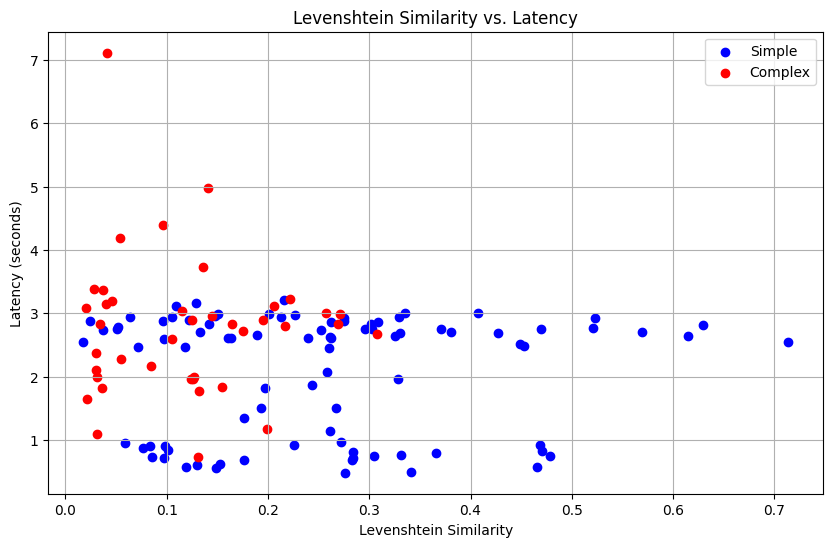

<Figure size 640x480 with 0 Axes>

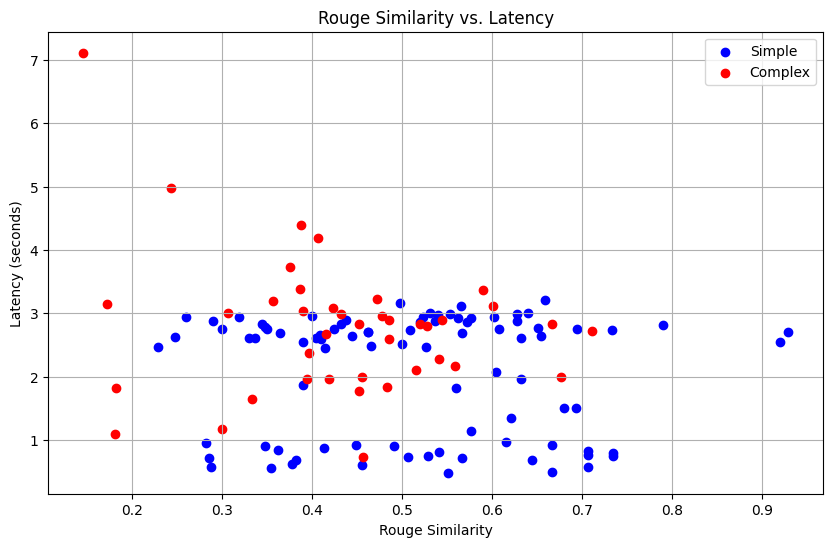

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

image_dir = base_dir + '/Images'


# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_complete[df_complete['complexity'] == -1]['Gemma_Levenshtein'], df_complete[df_complete['complexity'] == -1]['Gemma_Latency'], color='blue', label='Simple')
plt.scatter(df_complete[df_complete['complexity'] == 1]['Gemma_Levenshtein'], df_complete[df_complete['complexity'] == 1]['Gemma_Latency'], color='red', label='Complex')

plt.xlabel('Levenshtein Similarity')
plt.ylabel('Latency (seconds)')
plt.title('Levenshtein Similarity vs. Latency')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig(image_dir + '\gemma_1_levenshtein')


# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_complete[df_complete['complexity'] == -1]['Gemma_Rouge'], df_complete[df_complete['complexity'] == -1]['Gemma_Latency'], color='blue', label='Simple')
plt.scatter(df_complete[df_complete['complexity'] == 1]['Gemma_Rouge'], df_complete[df_complete['complexity'] == 1]['Gemma_Latency'], color='red', label='Complex')

plt.xlabel('Rouge Similarity')
plt.ylabel('Latency (seconds)')
plt.title('Rouge Similarity vs. Latency')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig(image_dir + '\gemma_1_rouge')



In [ ]:
# Now for LFM

import numpy as np
import time
from rouge_score import rouge_scorer

df_complete['Latency'] = np.nan
df_complete['Rouge'] = np.nan
df_complete['Levenshtein'] = np.nan

# Levenshtein similarity using difflib
def levenshtein_similarity(a, b):
    return difflib.SequenceMatcher(None, str(a), str(b)).ratio()

rouge_scorer_tool = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)

for index, row in df_complete.iterrows():
  start_time = time.perf_counter()
  df_complete['sql_gen'] = generate_sql_query("lfm", row['Natural Language Query'], row['Schema'], row['Top 5 Entries of Table'], 2)
  end_time = time.perf_counter()
  df_complete.at[index, 'Latency'] = end_time - start_time
  df_complete.at[index, 'Levenshtein'] = levenshtein_similarity(row['SQL Query'], df_complete.at[index, 'sql_gen'])
  df_complete.at[index, 'Rouge'] = rouge_scorer_tool.score(row['SQL Query'], df_complete.at[index, 'sql_gen'])['rouge1'].fmeasure


RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit exceeded: free-models-per-min', 'code': 429}}

In [ ]:
import matplotlib.pyplot as plt

image_dir = base_dir + '/Images'

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_complete[df_complete['complexity'] == -1]['Levenshtein'], df_complete[df_complete['complexity'] == -1]['Latency'], color='blue', label='Simple')
plt.scatter(df_complete[df_complete['complexity'] == 1]['Levenshtein'], df_complete[df_complete['complexity'] == 1]['Latency'], color='red', label='Complex')

plt.xlabel('Levenshtein Similarity')
plt.ylabel('Latency (seconds)')
plt.title('Levenshtein Similarity vs. Latency')
plt.legend()
plt.grid(True)
# plt.show()

plt.savefig(image_dir + '\lfm_levenshtein')


# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_complete[df_complete['complexity'] == -1]['Rouge'], df_complete[df_complete['complexity'] == -1]['Latency'], color='blue', label='Simple')
plt.scatter(df_complete[df_complete['complexity'] == 1]['Rouge'], df_complete[df_complete['complexity'] == 1]['Latency'], color='red', label='Complex')

plt.xlabel('Rouge Similarity')
plt.ylabel('Latency (seconds)')
plt.title('Rouge Similarity vs. Latency')
plt.legend()
plt.grid(True)
# plt.show()

plt.savefig(image_dir + '\lfm_rouge')

# Metric Analysis

In [ ]:
!pip install rouge-score bert-score
!pip install nltk
!pip install sqlparse

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=d6db774e0c1632cd59f6eef979a5df5046a26491e79f1c119b5b48f9331640c5
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
import pandas as pd
import os
import sqlparse
from sqlparse.sql import IdentifierList, Identifier
from sqlparse.tokens import Keyword, DML
import difflib
# import ntlk
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from nltk.util import ngrams
from collections import Counter
import json
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def extract_query_components(query):
    # Parse the SQL query
    parsed = sqlparse.parse(query)[0]

    # Initialize components
    tables = []
    columns = []
    conditions = []

    # Extract tokens
    for token in parsed.tokens:
        if token.ttype is DML and token.value.upper() == 'SELECT':
            pass  # Handle SELECT clause
        elif isinstance(token, IdentifierList):
            for identifier in token.get_identifiers():
                columns.append(identifier.get_real_name())
        elif isinstance(token, Identifier):
            tables.append(token.get_real_name())
        elif token.ttype is Keyword and token.value.upper() in ('WHERE', 'ORDER BY', 'GROUP BY'):
            conditions.append(token)

    return {
        'tables': set(tables),
        'columns': set(columns),
        'conditions': set(conditions)
    }

def sql_semantic_match(query1, query2):
    # Normalize and extract components from both queries
    components1 = extract_query_components(query1)
    components2 = extract_query_components(query2)

    # Compare tables, columns, and conditions
    table_match = components1['tables'] == components2['tables']
    column_match = components1['columns'] == components2['columns']
    condition_match = components1['conditions'] == components2['conditions']

    # If all components match, the queries are semantically similar
    return table_match and column_match and condition_match

# Example usage
query1 = "SELECT name FROM employees WHERE age > 30 ORDER BY name"
query2 = "SELECT name FROM employees ORDER BY name WHERE age > 30"

print("Queries are semantically equivalent:", sql_semantic_match(query1, query2))

Queries are semantically equivalent: False


In [ ]:
# Paths to each file

base_dir = '/content/drive/MyDrive/RTS_Chetan_Chathurvedhi'
sql_dir = base_dir + '/SQL'

sql_path = {
    "Crime_Simple":'/crime_simple.csv',
    "Crime_Complex":'/crime_complex.csv',
    "Shooting_Simple":'/shooting_simple.csv',
    "Shooting_Complex":'/shooting_complex.csv',
    "Housing_Simple":'/housing_simple.csv',
    "Housing_Complex":'/housing_complex.csv',
    "Complete":'/complete.csv',
    "Simple":'/simple.csv',
    "Complex":'/complex.csv'
}

models = ["phi", "lfm", "gemma_1", "gemma_2", "llama", "mistral"]


### Functions for similarity functions

In [ ]:
# Levenshtein similarity using difflib
def levenshtein_similarity(a, b):
    return difflib.SequenceMatcher(None, str(a), str(b)).ratio()

def tokenize_sql(query):
    return sqlparse.format(query, keyword_case='upper').split()

# Token-based similarity: Jaccard and Cosine
def jaccard_similarity(query1, query2):
    tokens1 = set(query1.split())
    tokens2 = set(query2.split())
    intersection = tokens1.intersection(tokens2)
    union = tokens1.union(tokens2)
    return len(intersection) / len(union)

# Cosine_similarity
def cosine_similarity(query1, query2):
    tokens1 = Counter(query1.split())
    tokens2 = Counter(query2.split())
    all_tokens = set(tokens1.keys()).union(set(tokens2.keys()))
    dot_product = sum(tokens1[token] * tokens2[token] for token in all_tokens)
    norm1 = sum(value**2 for value in tokens1.values())**0.5
    norm2 = sum(value**2 for value in tokens2.values())**0.5
    return dot_product / (norm1 * norm2)

# Word Error Rate (WER)
def word_error_rate(reference, hypothesis):
    ref_tokens = reference.split()
    hyp_tokens = hypothesis.split()
    return levenshtein_similarity(reference, hypothesis) / len(ref_tokens)

# Evaluating the df with model
def evaluate_sql(file_path, model):

  df = pd.read_csv(file_path)

  total_queries = len(df)
  results = {
      "levenshtein_similarity": [],
      "jaccard_similarity": [],
      "cosine_similarity": [],
      "word_error_rate": [],
      "exact_match": [],
      "clause_level_precision": [],
      "clause_level_recall": [],
      "clause_level_f1": [],
      "bleu_score": [],
      "rouge_1": [],
      "rouge_2": [],
      "rouge_l": []
  }

  # Initialize ROUGE scorer
  rouge_scorer_tool = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

  for _, row in df.iterrows():
    reference = row["SQL Query"]
    hypothesis = row[model]

    reference_normalized = sqlparse.format(reference, reindent=True, keyword_case='upper')
    hypothesis_normalized = sqlparse.format(hypothesis, reindent=True, keyword_case='upper')

    # Levenshtein Similarity (1 - normalized distance)
    results["levenshtein_similarity"].append(levenshtein_similarity(reference, hypothesis))

    # Jaccard Similarity
    jaccard_sim = jaccard_similarity(reference, hypothesis)
    results["jaccard_similarity"].append(jaccard_sim)

    # Cosine Similarity
    cosine_sim = cosine_similarity(reference, hypothesis)
    results["cosine_similarity"].append(cosine_sim)

    # Word Error Rate
    wer = word_error_rate(reference, hypothesis)
    results["word_error_rate"].append(wer)

    # Exact Match
    exact_match = 1 if reference.strip() == hypothesis.strip() else 0
    results["exact_match"].append(exact_match)

    # Clause-level Comparison (Token-based)
    exact_tokens = set(reference_normalized.split())
    generated_tokens = set(hypothesis_normalized.split())

    # Calculate Precision, Recall, F1
    intersection = exact_tokens & generated_tokens
    precision = len(intersection) / len(generated_tokens) if generated_tokens else 0
    recall = len(intersection) / len(exact_tokens) if exact_tokens else 0
    f1_score = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

    results["clause_level_precision"].append(precision)
    results["clause_level_recall"].append(recall)
    results["clause_level_f1"].append(f1_score)

    # Tokenize queries
    reference_tokens = tokenize_sql(reference)
    hypothesis_tokens = tokenize_sql(hypothesis)

    # BLEU Score
    results["bleu_score"].append(sentence_bleu([reference_tokens], hypothesis_tokens))

    # ROUGE Scores
    rouge_result = rouge_scorer_tool.score(reference, hypothesis)
    results["rouge_1"].append(rouge_result["rouge1"].fmeasure)
    results["rouge_2"].append(rouge_result["rouge2"].fmeasure)
    results["rouge_l"].append(rouge_result["rougeL"].fmeasure)

  # Return average metrics
  Metrics = {}
  for metric, values in results.items():
    Metrics[metric] = round(sum(values) / total_queries, 3)
  return Metrics

metric_path = base_dir + '/Metrics/metrics.json'


In [ ]:
Metric_Results = {}

for key, value in sql_path.items():
  print("Working on " + key)
  file_results = {}
  for model in models:
    path = sql_dir + value
    file_results[model] = evaluate_sql(path, model)
    print(model, end = " ")
  Metric_Results[key] = file_results
  print("Done")

Working on Crime_Simple
phi lfm gemma_1 gemma_2 llama mistral Done
Working on Crime_Complex
phi lfm gemma_1 gemma_2 llama mistral Done
Working on Shooting_Simple
phi lfm gemma_1 gemma_2 llama mistral Done
Working on Shooting_Complex
phi lfm gemma_1 gemma_2 llama mistral Done
Working on Housing_Simple
phi lfm gemma_1 gemma_2 llama mistral Done
Working on Housing_Complex
phi lfm gemma_1 gemma_2 llama mistral Done
Working on Complete
phi lfm gemma_1 gemma_2 llama mistral Done
Working on Simple
phi lfm gemma_1 gemma_2 llama mistral Done
Working on Complex
phi lfm gemma_1 gemma_2 llama mistral Done


In [ ]:
# Save to a JSON file
with open(metric_path, "w") as file:
    json.dump(Metric_Results, file)

In [ ]:
# Pulling from JSON file
with open(metric_path, "r") as file:
    Metric_Results = json.load(file)

### Analysis on individual datasets

In [ ]:
datasets = ["Crime_Simple", "Crime_Complex", "Shooting_Simple", "Shooting_Complex", "Housing_Simple", "Housing_Complex", "Simple", "Complete", "Complex"]

metric_df_dir = base_dir + '/Metrics'

for dataset in datasets:
  print("Working on " + dataset)
  df = pd.DataFrame(Metric_Results[dataset]).transpose()
  df.to_csv(metric_df_dir + '/' + dataset + '_metrics.csv')
  print("Done")

Working on Crime_Simple
Done
Working on Crime_Complex
Done
Working on Shooting_Simple
Done
Working on Shooting_Complex
Done
Working on Housing_Simple
Done
Working on Housing_Complex
Done
Working on Simple
Done
Working on Complete
Done
Working on Complex
Done


# Reference and Old Code

In [ ]:
def evaluate_sql_from_csv(file_path, model):
    # Read CSV file
    df = pd.read_csv(file_path)

    # Initialize metrics
    metrics = {
        "exact_match": 0,
        "avg_levenshtein_similarity": 0,
        "clause_level_precision": [],
        "clause_level_recall": [],
        "clause_level_f1": []
    }

    # Total queries
    total_queries = len(df)
    levenshtein_scores = []

    for _, row in df.iterrows():
        exact_query = row["SQL Query"]
        generated_query = row[model]

        # Normalize queries
        exact_normalized = sqlparse.format(exact_query, reindent=True, keyword_case='upper')
        generated_normalized = sqlparse.format(generated_query, reindent=True, keyword_case='upper')

        # Exact Match
        if exact_normalized.strip() == generated_normalized.strip():
            metrics["exact_match"] += 1

        # Levenshtein Similarity
        levenshtein_scores.append(levenshtein_similarity(exact_normalized, generated_normalized))

        # Clause-level Comparison (Token-based)
        exact_tokens = set(exact_normalized.split())
        generated_tokens = set(generated_normalized.split())

        # Calculate Precision, Recall, F1
        intersection = exact_tokens & generated_tokens
        precision = len(intersection) / len(generated_tokens) if generated_tokens else 0
        recall = len(intersection) / len(exact_tokens) if exact_tokens else 0
        f1_score = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

        metrics["clause_level_precision"].append(precision)
        metrics["clause_level_recall"].append(recall)
        metrics["clause_level_f1"].append(f1_score)

    # Finalize Metrics
    metrics["exact_match"] /= total_queries
    metrics["avg_levenshtein_similarity"] = sum(levenshtein_scores) / total_queries
    metrics["avg_precision"] = sum(metrics["clause_level_precision"]) / total_queries
    metrics["avg_recall"] = sum(metrics["clause_level_recall"]) / total_queries
    metrics["avg_f1"] = sum(metrics["clause_level_f1"]) / total_queries

    return metrics

# Metric Calculations
def evaluate_sql_with_metrics(file_path, model):
    # Load CSV
    df = pd.read_csv(file_path)

    # Initialize metrics
    bleu_scores = []
    rouge_scores = {"rouge-1": [], "rouge-2": [], "rouge-l": []}

    # Initialize ROUGE scorer
    rouge_scorer_tool = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    for _, row in df.iterrows():
        reference = row["SQL Query"]
        hypothesis = row[model]

        # Tokenize queries
        reference_tokens = tokenize_sql(reference)
        hypothesis_tokens = tokenize_sql(hypothesis)

        # BLEU Score
        bleu_scores.append(sentence_bleu([reference_tokens], hypothesis_tokens))

        # ROUGE Scores
        rouge_result = rouge_scorer_tool.score(reference, hypothesis)
        rouge_scores["rouge-1"].append(rouge_result["rouge1"].fmeasure)
        rouge_scores["rouge-2"].append(rouge_result["rouge2"].fmeasure)
        rouge_scores["rouge-l"].append(rouge_result["rougeL"].fmeasure)

    # Aggregate results
    results = {
        "avg_bleu": sum(bleu_scores) / len(bleu_scores),
        "avg_rouge-1": sum(rouge_scores["rouge-1"]) / len(rouge_scores["rouge-1"]),
        "avg_rouge-2": sum(rouge_scores["rouge-2"]) / len(rouge_scores["rouge-2"]),
        "avg_rouge-l": sum(rouge_scores["rouge-l"]) / len(rouge_scores["rouge-l"]),
    }

    return results


# Evaluation Function
def evaluate_simple_metrics(file_path):
    df = pd.read_csv(file_path)

    results = {
        "levenshtein_similarity": [],
        "jaccard_similarity": [],
        "cosine_similarity": [],
        "word_error_rate": [],
        "exact_match": [],
    }

    for _, row in df.iterrows():
        reference = row["SQL Query"]
        hypothesis = row["gpt_sql"]

        # Levenshtein Similarity (1 - normalized distance)
        levenshtein_sim = 1 - levenshtein_similarity(reference, hypothesis) / max(len(reference), len(hypothesis))
        results["levenshtein_similarity"].append(levenshtein_sim)

        # Jaccard Similarity
        jaccard_sim = jaccard_similarity(reference, hypothesis)
        results["jaccard_similarity"].append(jaccard_sim)

        # Cosine Similarity
        cosine_sim = cosine_similarity(reference, hypothesis)
        results["cosine_similarity"].append(cosine_sim)

        # Word Error Rate
        wer = word_error_rate(reference, hypothesis)
        results["word_error_rate"].append(wer)

        # Exact Match
        exact_match = 1 if reference.strip() == hypothesis.strip() else 0
        results["exact_match"].append(exact_match)

    # Average Metrics
    avg_results = {metric: sum(values) / len(values) for metric, values in results.items()}
    return avg_results


# Presentation Plots

In [ ]:
# Latency vs Metrics for LFM vs Gemma_1

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

base_dir = '/content/drive/MyDrive/RTS_Chetan_Chathurvedhi'

df = pd.read_csv(base_dir + '/SQL/latency_comp.csv')

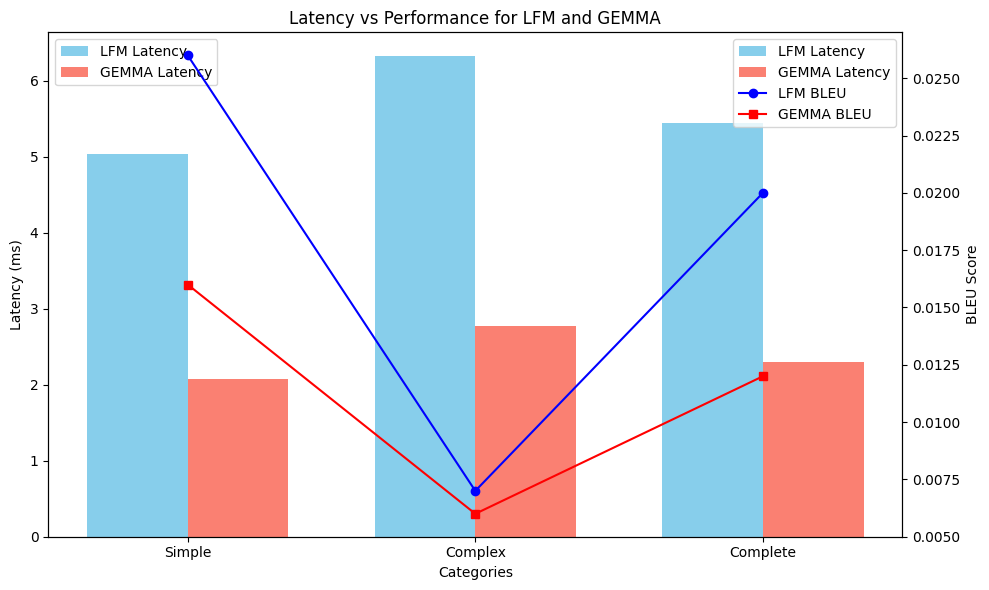

In [ ]:
simple_count = 88
complex_count = 40

# gemma_simple_lat = 182.85
# gemma_complex_lat = 110.90

# lfm_simple_lat = 443.54
# lfm_complex_lat = 252.81

# gemma_simple_bleu = 0.016
# lfm_simple_bleu = 0.026

# gemma_complex_bleu = 0.006
# lfm_complex_bleu = 0.007

# lfm_complete_lat = lfm_complex_lat + lfm_simple_lat
# gemma_complete_lat = gemma_complex_lat + gemma_simple_lat

# lfm_complete_bleu = 0.02
# gemma_complete_bleu = 0.012

# Data
categories = ['Simple', 'Complex', 'Complete']
latencies_lfm = [443.54/88, 252.81/40, (443.54 + 252.81)/128]
latencies_gemma = [182.85/88, 110.90/40, (182.85 + 110.90)/128]
bleu_scores_lfm = [0.026, 0.007, 0.02]
bleu_scores_gemma = [0.016, 0.006, 0.012]

# Scaling the latencies by count


x = np.arange(len(categories))  # label locations
width = 0.35  # width of the bars

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Latency bars
bar1 = ax1.bar(x - width/2, latencies_lfm, width, label='LFM Latency', color='skyblue')
bar2 = ax1.bar(x + width/2, latencies_gemma, width, label='GEMMA Latency', color='salmon')

# Set up the primary y-axis for latency
ax1.set_xlabel('Categories')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_title('Latency vs Performance for LFM and GEMMA')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# BLEU scores
ax2 = ax1.twinx()  # Secondary y-axis for BLEU scores
ax2.plot(x, bleu_scores_lfm, marker='o', label='LFM BLEU', color='blue')
ax2.plot(x, bleu_scores_gemma, marker='s', label='GEMMA BLEU', color='red')
ax2.set_ylabel('BLEU Score', color='black')

# Combine legends from both axes
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Display the plot
plt.tight_layout()
plt.show()


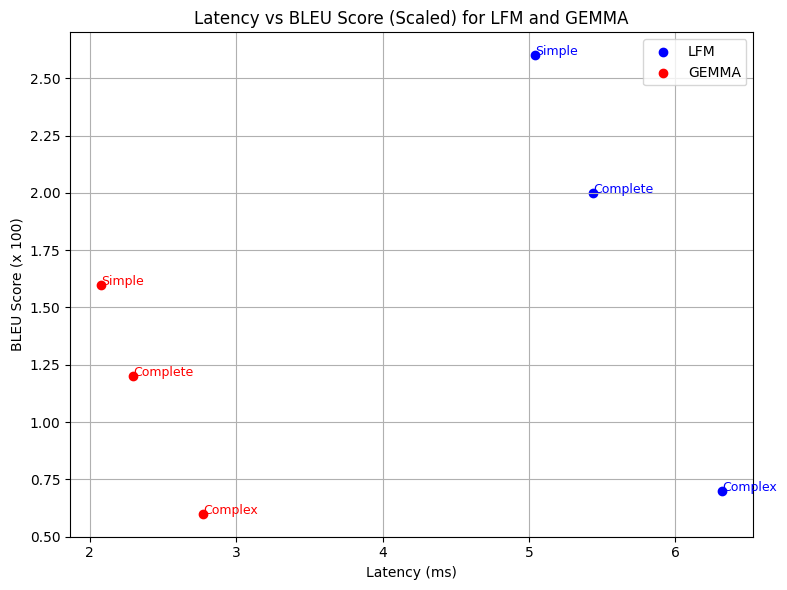

In [ ]:

# Scale BLEU scores to milli-BLEU
bleu_scores_lfm_scaled = [score * 100 for score in bleu_scores_lfm]
bleu_scores_gemma_scaled = [score * 100 for score in bleu_scores_gemma]

# Scatter plot
plt.figure(figsize=(8, 6))

# LFM
plt.scatter(latencies_lfm, bleu_scores_lfm_scaled, color='blue', label='LFM')
for i, category in enumerate(categories):
    plt.text(latencies_lfm[i], bleu_scores_lfm_scaled[i], category, color='blue', fontsize=9)

# GEMMA
plt.scatter(latencies_gemma, bleu_scores_gemma_scaled, color='red', label='GEMMA')
for i, category in enumerate(categories):
    plt.text(latencies_gemma[i], bleu_scores_gemma_scaled[i], category, color='red', fontsize=9)

# Labels and title
plt.xlabel('Latency (ms)')
plt.ylabel('BLEU Score (x 100)')
plt.title('Latency vs BLEU Score (Scaled) for LFM and GEMMA')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

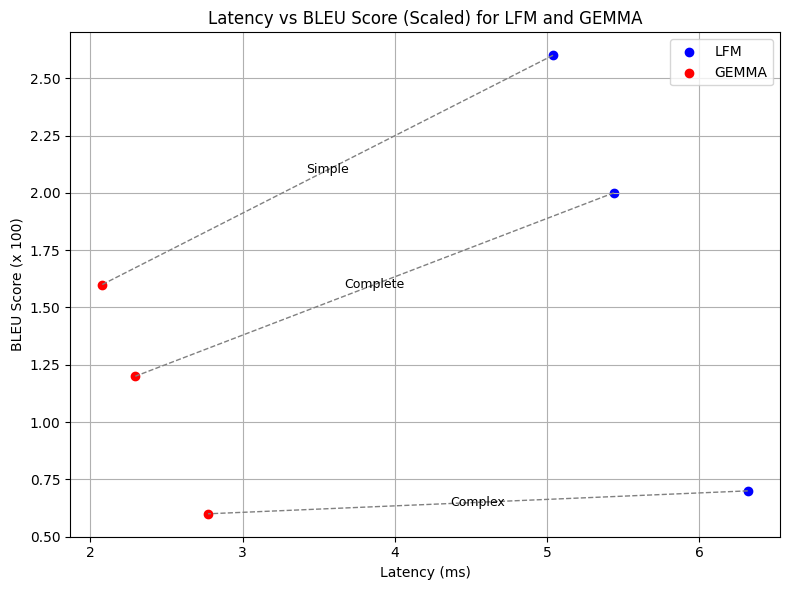

In [ ]:

# Scale BLEU scores to centi-BLEU
bleu_scores_lfm_scaled = [score * 100 for score in bleu_scores_lfm]
bleu_scores_gemma_scaled = [score * 100 for score in bleu_scores_gemma]

# Scatter plot
plt.figure(figsize=(8, 6))

# Scatter points
plt.scatter(latencies_lfm, bleu_scores_lfm_scaled, color='blue', label='LFM')
plt.scatter(latencies_gemma, bleu_scores_gemma_scaled, color='red', label='GEMMA')

# Add lines connecting points of the same category
for i, category in enumerate(categories):
    plt.plot(
        [latencies_lfm[i], latencies_gemma[i]],
        [bleu_scores_lfm_scaled[i], bleu_scores_gemma_scaled[i]],
        color='gray', linestyle='--', linewidth=1
    )
    plt.text((latencies_lfm[i] + latencies_gemma[i]) / 2,
             (bleu_scores_lfm_scaled[i] + bleu_scores_gemma_scaled[i]) / 2,
             category, fontsize=9, ha='center', va='center')

# Labels and title
plt.xlabel('Latency (ms)')
plt.ylabel('BLEU Score (x 100)')
plt.title('Latency vs BLEU Score (Scaled) for LFM and GEMMA')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import json

metrics_loc = base_dir + '/Metrics/metrics.json'
Metric_Results = {}

with open(metrics_loc, "r") as file:
  Metric_Results = json.load(file)

Simple_Metrics = Metric_Results["Simple"]
Complex_Metrics = Metric_Results["Complex"]
Complete_Metrics = Metric_Results["Complete"]

simple_df = pd.DataFrame(Simple_Metrics).transpose()
complex_df = pd.DataFrame(Complex_Metrics).transpose()
complete_df = pd.DataFrame(Complete_Metrics).transpose()



{'phi': {'levenshtein_similarity': 0.112, 'jaccard_similarity': 0.076, 'cosine_similarity': 0.07, 'word_error_rate': 0.004, 'exact_match': 0.0, 'clause_level_precision': 0.105, 'clause_level_recall': 0.433, 'clause_level_f1': 0.165, 'bleu_score': 0.008, 'rouge_1': 0.319, 'rouge_2': 0.176, 'rouge_l': 0.259}, 'lfm': {'levenshtein_similarity': 0.217, 'jaccard_similarity': 0.165, 'cosine_similarity': 0.129, 'word_error_rate': 0.009, 'exact_match': 0.0, 'clause_level_precision': 0.368, 'clause_level_recall': 0.4, 'clause_level_f1': 0.362, 'bleu_score': 0.026, 'rouge_1': 0.518, 'rouge_2': 0.305, 'rouge_l': 0.462}, 'gemma_1': {'levenshtein_similarity': 0.251, 'jaccard_similarity': 0.166, 'cosine_similarity': 0.122, 'word_error_rate': 0.011, 'exact_match': 0.0, 'clause_level_precision': 0.336, 'clause_level_recall': 0.393, 'clause_level_f1': 0.349, 'bleu_score': 0.016, 'rouge_1': 0.515, 'rouge_2': 0.291, 'rouge_l': 0.46}, 'gemma_2': {'levenshtein_similarity': 0.097, 'jaccard_similarity': 0.067